### EDA On Flight Fare Prediction

In [97]:
### Importing all the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings

warnings.filterwarnings("ignore")


In [22]:
pd.set_option('display.max_columns',None)
df = pd.read_excel("Dataset/Data_Train.xlsx")


In [23]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [24]:
### shape of dataset
df.shape

(10683, 11)

In [25]:
### checking for data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [26]:
### Most of my columns data types are in object form...I need to transform them

In [27]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [28]:
### There is only one row with null values so, I will be dropping that particular row
df.dropna(axis=0,inplace=True)

In [29]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [30]:
df.shape

(10682, 11)

In [31]:
### Differentiating numerical and categorical columns from the entier dataset
numerical_features = [feature for feature in df.columns if df[feature].dtype!= 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype== 'O']
print("numerical_features", numerical_features)
print("categorical_features", categorical_features)

numerical_features ['Price']
categorical_features ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info']


In [33]:
### only the dependent column is of integer datatype, so now let's transform eack columns

In [35]:
df.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


First I will clean Date_of_Journey column


In [36]:
### converting date_of_journey column into datetime format for further transformation
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"], infer_datetime_format = True)

In [37]:
### Not extracting years from from date of journey as only one year "2019" data is present
df["Journey_Day"] = df["Date_of_Journey"].dt.day
df["Journey_Month"] = df["Date_of_Journey"].dt.month

### dropped Date_of_Journey column
df.drop("Date_of_Journey", axis=1,inplace=True)


In [38]:
df.head(1)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3


Now, I will clean Dep_Time column

In [39]:
### extracting dep_hour and dep_minute from departure time columns
df["Dep_hour"]= df["Dep_Time"].str.split(":").str[0]
df["Dep_Minute"] = df["Dep_Time"].str.split(":").str[1]

df.drop("Dep_Time", axis=1,inplace=True)

In [40]:
df.head(1)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20


 Now, I will clean Arrival_Time column

In [43]:
### extracting only time from the arrival time columns and removing information about day and month
df["Arrival_Time"] = df["Arrival_Time"].str.split(" ").str[0]

In [44]:
### extracting arrival_hour and arrival_minute from Arrival_Time column
df["Arrival_hour"] = df["Arrival_Time"].str.split(":").str[0]
df["Arrival_minute"] = df["Arrival_Time"].str.split(":").str[1]

df.drop("Arrival_Time", axis=1,inplace=True)

In [45]:
df.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,01,10


In [47]:
 ### Now, I will clean Duration column

In [48]:
### extracting duration_hour and duration_minute from duration column
df["Duration_hour"] = df["Duration"].str.split(" ").str[0].str.split("h").str[0]
df["Duration_minutes"] = df["Duration"].str.split(" ").str[1].str.split("m").str[0]

df.drop("Duration", axis=1,inplace=True)

In [49]:
df.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,01,10,2,50


In [50]:
df.isnull().sum()

Airline                0
Source                 0
Destination            0
Route                  0
Total_Stops            0
Additional_Info        0
Price                  0
Journey_Day            0
Journey_Month          0
Dep_hour               0
Dep_Minute             0
Arrival_hour           0
Arrival_minute         0
Duration_hour          0
Duration_minutes    1032
dtype: int64

In [51]:
### Filling nan values in duration_minutes column
df["Duration_minutes"] = df["Duration_minutes"].fillna(0)


In [52]:
df.isnull().sum()

Airline             0
Source              0
Destination         0
Route               0
Total_Stops         0
Additional_Info     0
Price               0
Journey_Day         0
Journey_Month       0
Dep_hour            0
Dep_Minute          0
Arrival_hour        0
Arrival_minute      0
Duration_hour       0
Duration_minutes    0
dtype: int64

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Source            10682 non-null  object
 2   Destination       10682 non-null  object
 3   Route             10682 non-null  object
 4   Total_Stops       10682 non-null  object
 5   Additional_Info   10682 non-null  object
 6   Price             10682 non-null  int64 
 7   Journey_Day       10682 non-null  int64 
 8   Journey_Month     10682 non-null  int64 
 9   Dep_hour          10682 non-null  object
 10  Dep_Minute        10682 non-null  object
 11  Arrival_hour      10682 non-null  object
 12  Arrival_minute    10682 non-null  object
 13  Duration_hour     10682 non-null  object
 14  Duration_minutes  10682 non-null  object
dtypes: int64(3), object(12)
memory usage: 1.3+ MB


In [54]:
df[df["Duration_hour"] =="5m"]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minutes
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,2 stops,No info,17327,6,3,16,50,16,55,5m,0


In [55]:
df.drop(6474, axis = 0, inplace = True)

In [56]:
df[df["Duration_hour"] == "5m"]

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minutes


In [58]:
### converting object data types into int after doing all the necessary transformation
df["Dep_hour"]  = df["Dep_hour"].astype(int)
df["Dep_Minute"]  = df["Dep_Minute"].astype(int)
df["Arrival_hour"] = df["Arrival_hour"].astype(int)
df["Arrival_minute"] = df["Arrival_minute"].astype(int)
df["Duration_minutes"] = df["Duration_minutes"].astype(int)
df["Duration_hour"] = df["Duration_hour"].astype(int)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10681 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10681 non-null  object
 1   Source            10681 non-null  object
 2   Destination       10681 non-null  object
 3   Route             10681 non-null  object
 4   Total_Stops       10681 non-null  object
 5   Additional_Info   10681 non-null  object
 6   Price             10681 non-null  int64 
 7   Journey_Day       10681 non-null  int64 
 8   Journey_Month     10681 non-null  int64 
 9   Dep_hour          10681 non-null  int32 
 10  Dep_Minute        10681 non-null  int32 
 11  Arrival_hour      10681 non-null  int32 
 12  Arrival_minute    10681 non-null  int32 
 13  Duration_hour     10681 non-null  int32 
 14  Duration_minutes  10681 non-null  int32 
dtypes: int32(6), int64(3), object(6)
memory usage: 1.1+ MB


In [60]:
df.head(1)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50


In [61]:
### Dropping these columns
df.drop(["Route","Additional_Info" ], axis=1, inplace=True)

In [62]:
### Differentiating numerical and categorical columns again after changing the data type of columns from the entier dataset
numerical_features = [feature for feature in df.columns if df[feature].dtype!= 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype== 'O']
print("numerical_features", numerical_features)
print("categorical_features", categorical_features)

numerical_features ['Price', 'Journey_Day', 'Journey_Month', 'Dep_hour', 'Dep_Minute', 'Arrival_hour', 'Arrival_minute', 'Duration_hour', 'Duration_minutes']
categorical_features ['Airline', 'Source', 'Destination', 'Total_Stops']


### Univariate Analysis of all the Numerical Columns

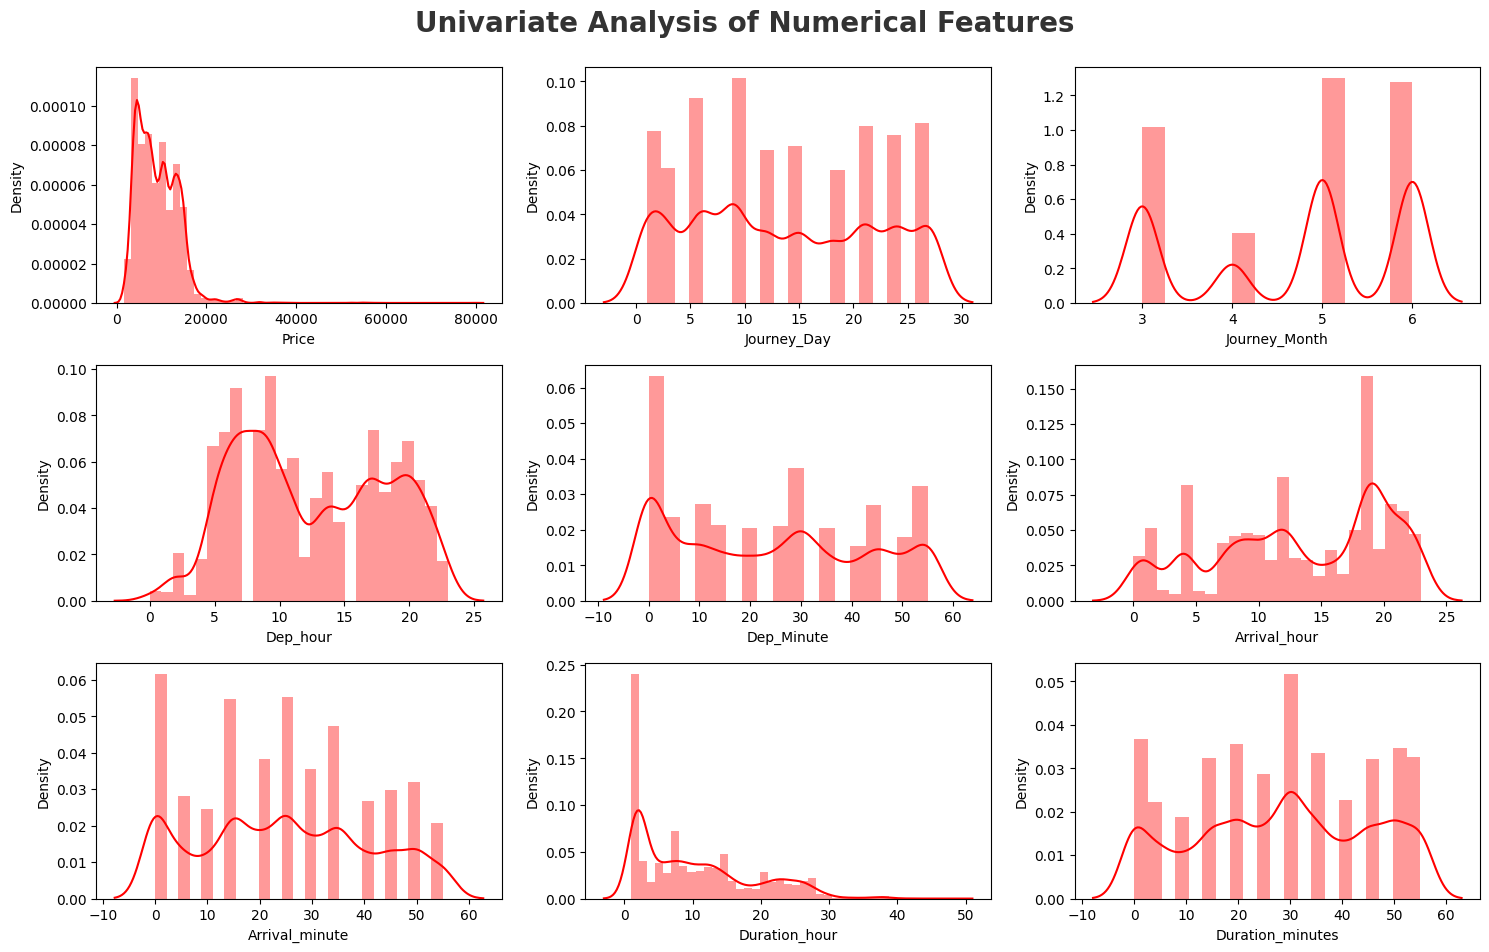

In [63]:
### distplot for all the numerical columns in the dataset

try:
    plt.figure(figsize=(15, 15))
    plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

    for i in range(0, len(numerical_features)):
        plt.subplot(5, 3, i+1)
        sns.distplot(x=df[numerical_features[i]], color='r')
        plt.xlabel(numerical_features[i])
        plt.tight_layout()
except Exception as e:
    print(e)


### Univariate Analysis of all the Categorical Columns

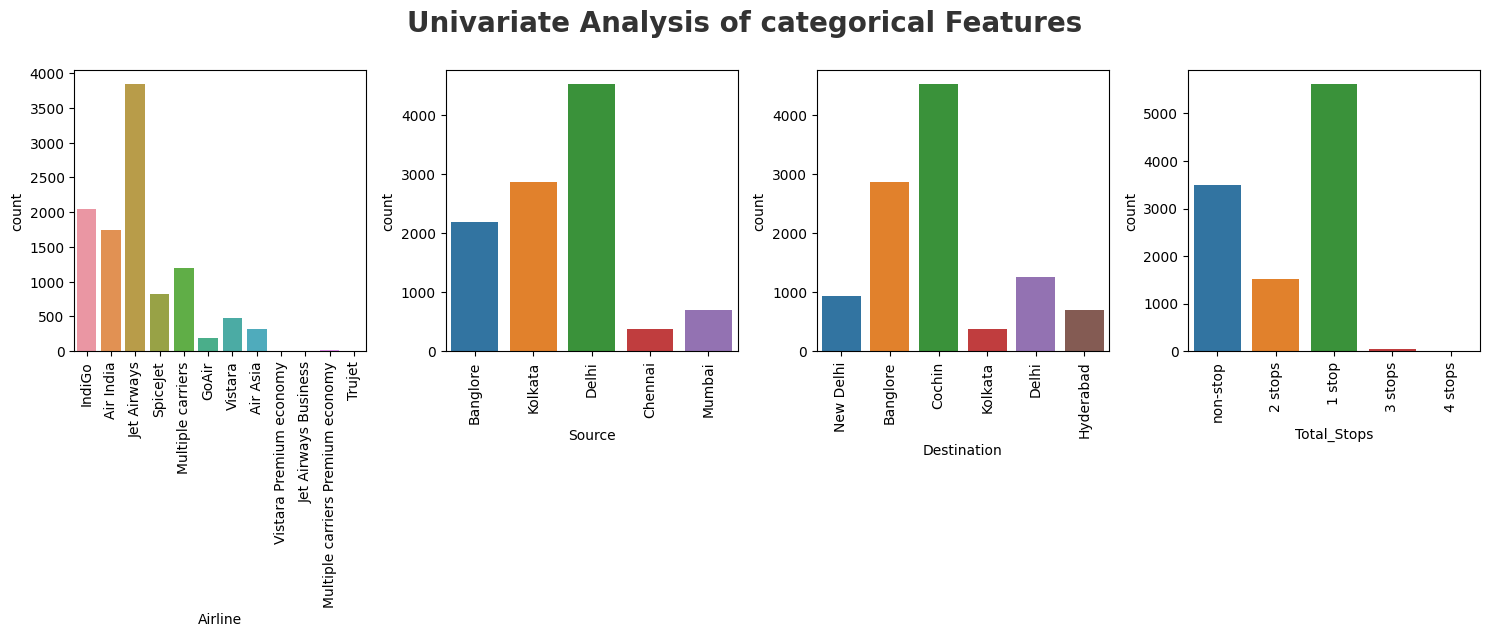

In [64]:
### countplot for all the categorical columns in the dataframe
try:
    plt.figure(figsize=(15, 15))
    plt.suptitle('Univariate Analysis of categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

    for i in range(0, len(categorical_features)):
        plt.subplot(3, 4, i+1)
        sns.countplot(x= df[categorical_features[i]])
        plt.xlabel(categorical_features[i])
        plt.tight_layout()
        plt.xticks(rotation=90)
except Exception as e:
    print(e)

### Bivariate analysis

In [70]:
Airline_price = df.groupby(["Airline"])["Price"].mean().sort_values(ascending = False).reset_index()

In [100]:
Airline_price

,Airline,Price
0,Jet Airways Business,58358.666667
1,Jet Airways,11643.923357
2,Multiple carriers Premium economy,11418.846154
3,Multiple carriers,10902.678094
4,Air India,9608.019429
5,Vistara Premium economy,8962.333333
6,Vistara,7796.348643
7,GoAir,5861.056701
8,IndiGo,5673.682903
9,Air Asia,5590.260188


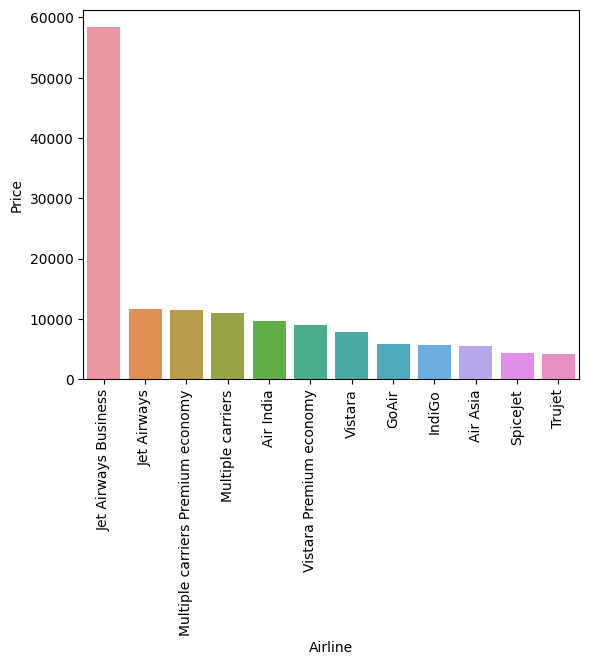

In [71]:
sns.barplot(data = Airline_price , x = "Airline", y = "Price")
plt.xticks(rotation=90)
plt.show()

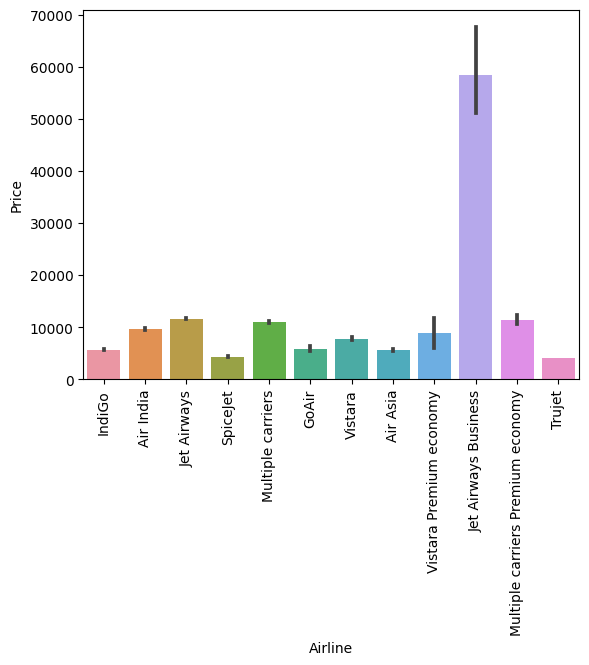

In [72]:
sns.barplot(data = df, x = "Airline", y = "Price")
plt.xticks(rotation=90)
plt.show()

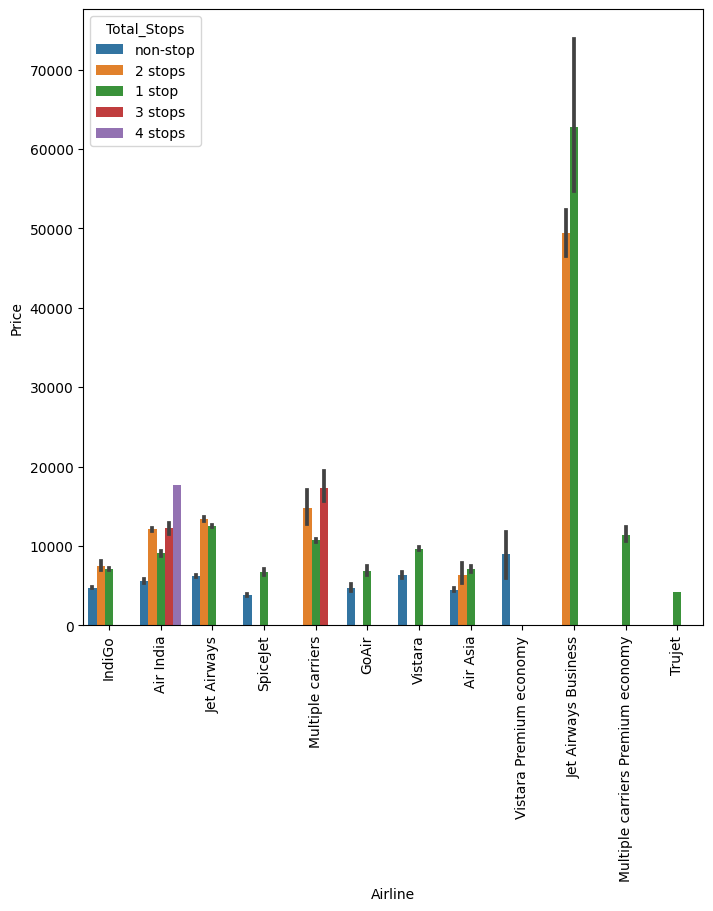

In [73]:
plt.figure(figsize=(8, 8))
sns.barplot(data = df, x="Airline", y = "Price", hue = "Total_Stops")
plt.xticks(rotation=90)
plt.show()

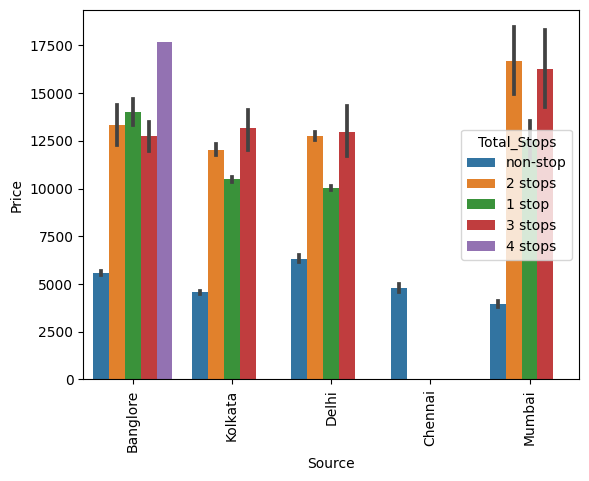

In [74]:
sns.barplot(data = df, x="Source", y = "Price", hue = "Total_Stops")
plt.xticks(rotation=90)
plt.show()

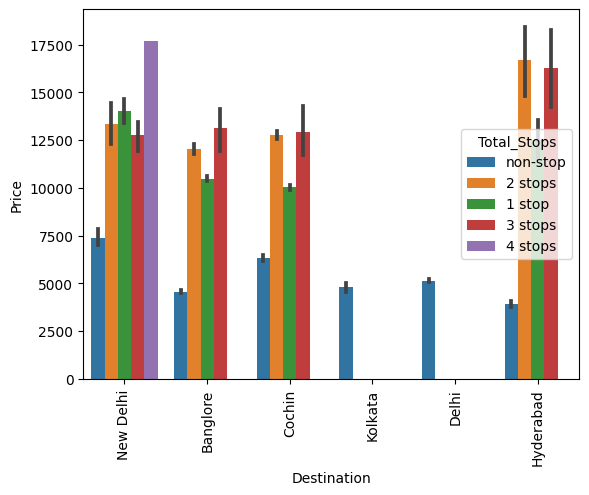

In [75]:
sns.barplot(data = df, x="Destination", y = "Price", hue = "Total_Stops")
plt.xticks(rotation=90)
plt.show()

In [76]:
total_Stops = df.groupby(["Total_Stops"])["Price"].mean().sort_values(ascending = False).reset_index()

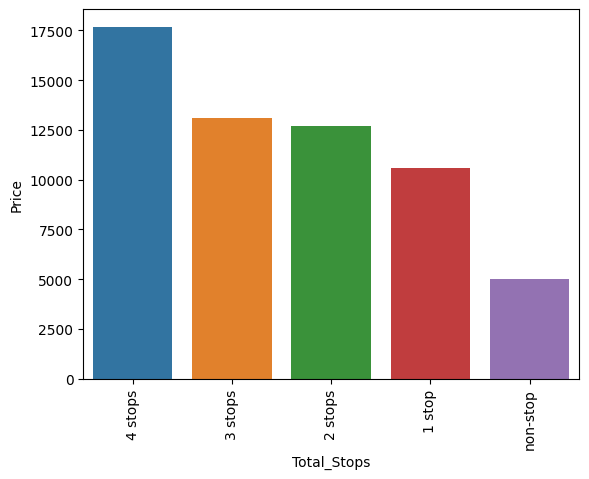

In [77]:
### flights with four stops are more expensive
sns.barplot(data = total_Stops, x = "Total_Stops", y = "Price")
plt.xticks(rotation=90)
plt.show()

### Now we will transform all our categorical_features


In [79]:
print("categorical_features", categorical_features)

categorical_features ['Airline', 'Source', 'Destination', 'Total_Stops']


In [80]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1750
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [81]:
### one hot encoding for Airline column
Airline = df[["Airline"]]
Airline = pd.get_dummies(Airline, drop_first = True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [82]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       696
Chennai      381
Name: Source, dtype: int64

In [83]:
### one hot encoding for Source column
Source =df[["Source"]]
Source = pd.get_dummies(Source, drop_first = True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [84]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

In [85]:
### one hot encoding for Destination column
Destination = df[["Destination"]]
Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [86]:
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1519
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [87]:
### Ordinal encoding for Total_Stops column
df["Total_Stops"] = df["Total_Stops"].map({"non-stop":0, "1 stop":1, "2 stops":2, "3 stops":3, "4 stops":4})

In [88]:
df["Total_Stops"].value_counts()

1    5625
0    3491
2    1519
3      45
4       1
Name: Total_Stops, dtype: int64

In [89]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [90]:
new_df = pd.concat([df, Airline, Source, Destination], axis = 1)

In [91]:
new_df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [92]:
new_df.drop(["Airline", "Source", "Destination"], axis=1, inplace=True)

In [93]:
new_df.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Dep_hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_hour,Duration_minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [94]:
new_df.shape

(10681, 30)

In [104]:
### Now Our dataset is ready to train a model